# Finding the Optimal K-Value Method Comparison

GET THE DATA

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

LOOK AT DATA STRUCTURE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = load_housing_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#fill it with the mean
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)
print(data.isna().sum()) #see that nothing is empty

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


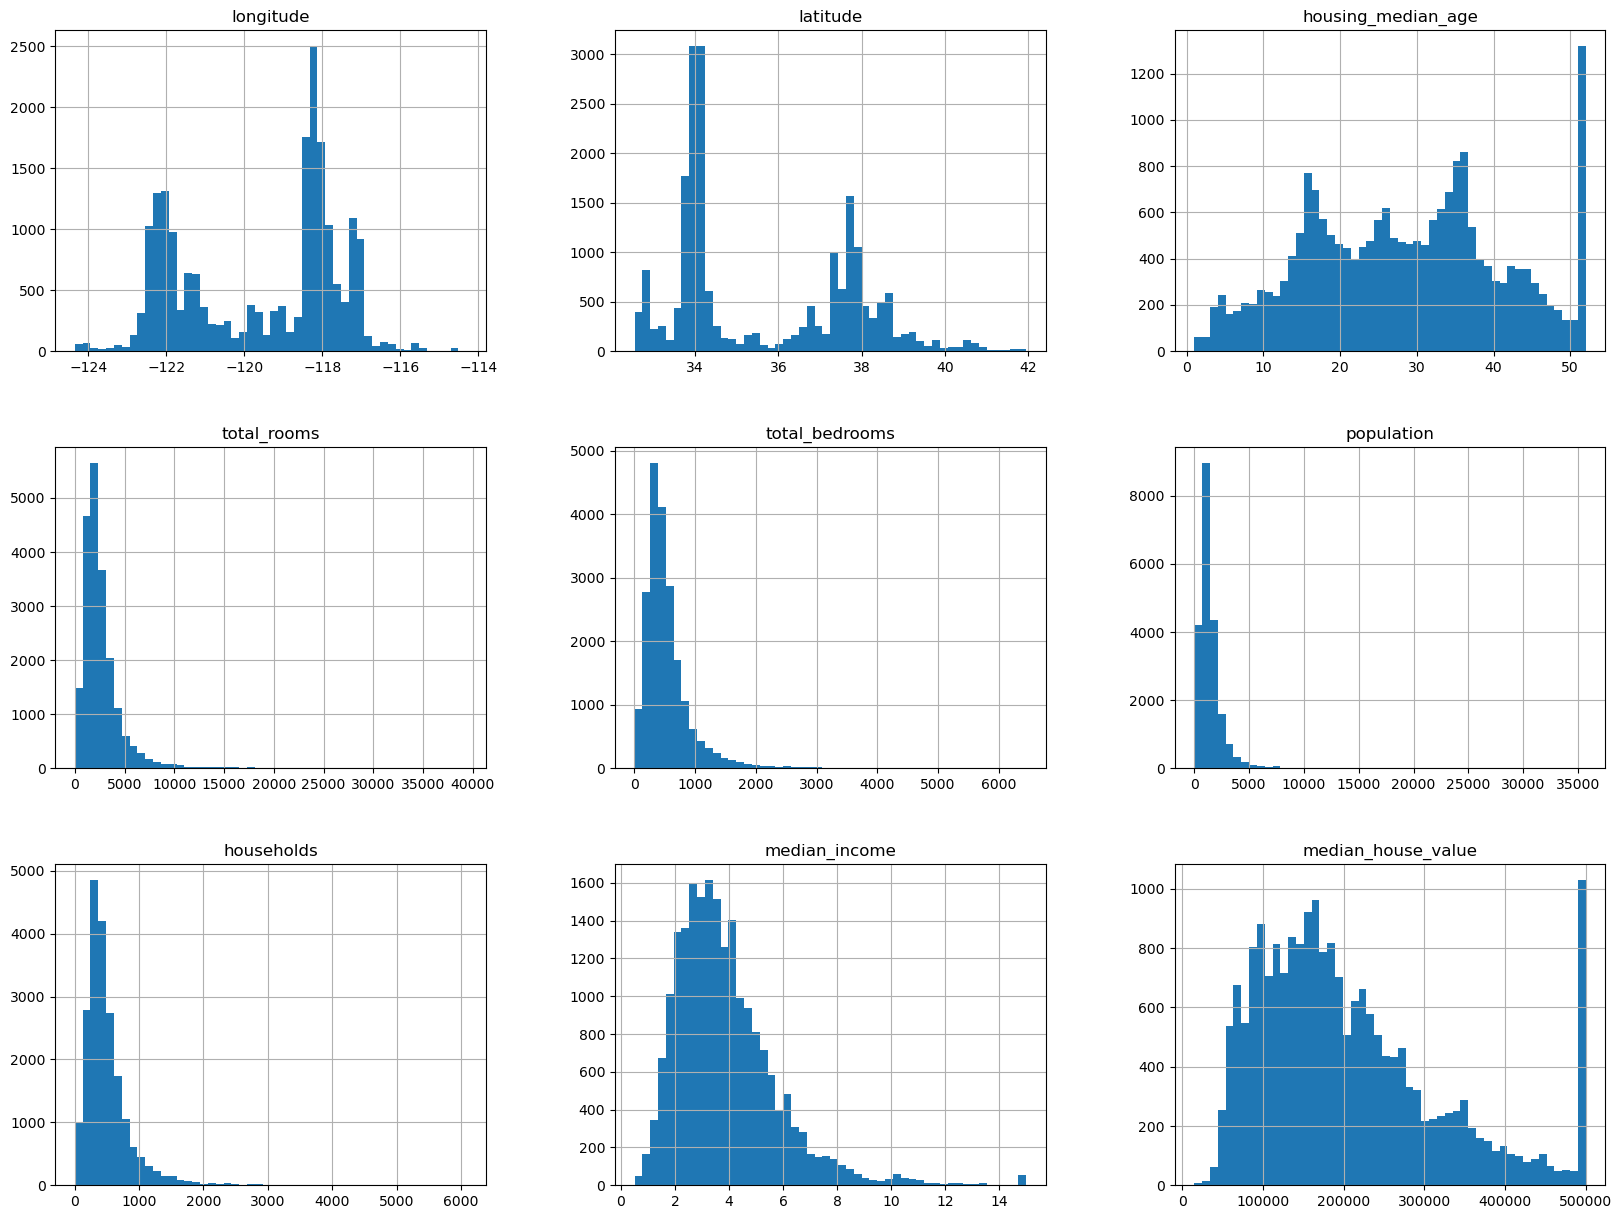

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

LOOK FOR CORRELATIONS

In [11]:
ocean_prox = pd.DataFrame(data['ocean_proximity'])
data = data.drop(columns=['ocean_proximity'])

In [12]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

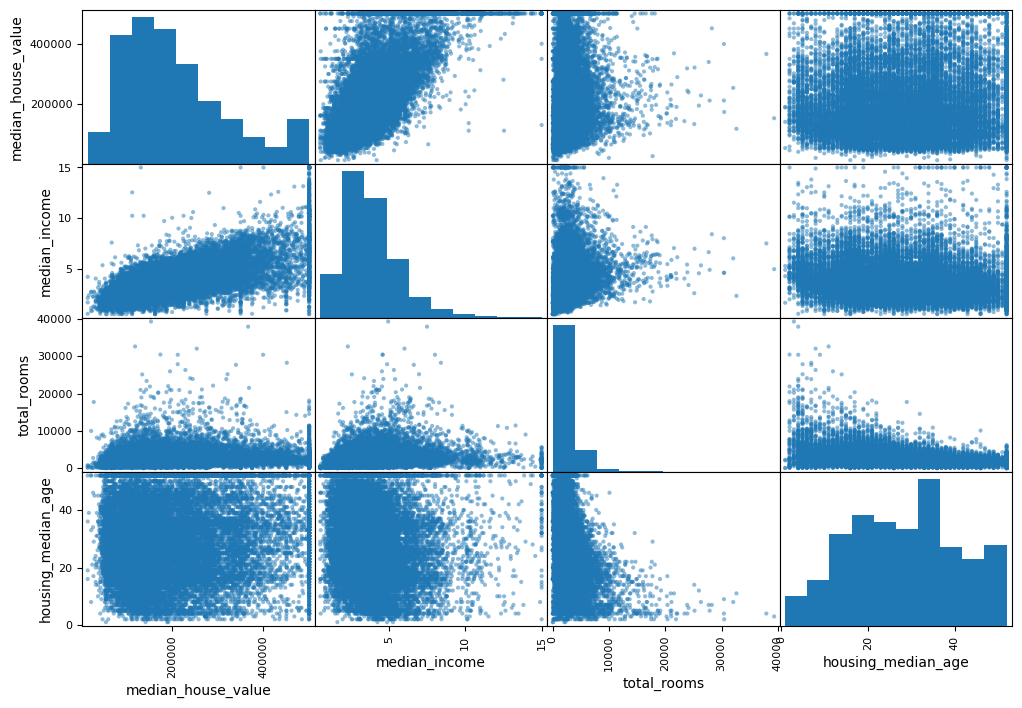

In [13]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

plotting median_income with house values

(0.0, 16.0, 0.0, 550000.0)

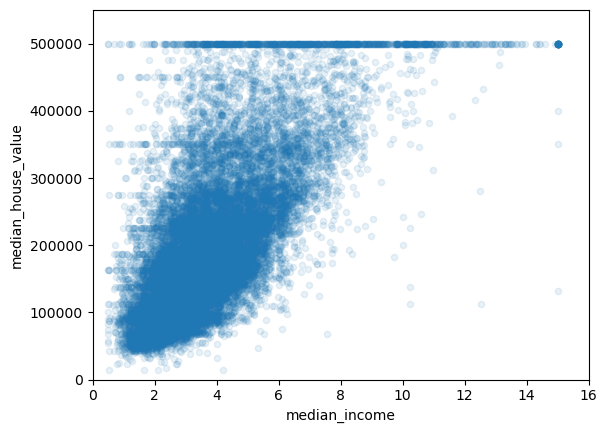

In [14]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
# the values at 500000 are not correlated. You would likely remove them to get more accurate insights from the data.

NORMALIZE

In [15]:
#normalization
mu = data.mean()
std = data.std()

print(mu)
print(std)

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64
longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           419.266592
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64


In [16]:
data_normalized = (data - mu) / std
data_normalized = pd.DataFrame(data_normalized)
print(data_normalized.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327803  1.052523            0.982119    -0.804800       -0.975204   
1  -1.322812  1.043159           -0.607004     2.045841        1.355055   
2  -1.332794  1.038478            1.856137    -0.535733       -0.829712   
3  -1.337785  1.038478            1.856137    -0.624199       -0.722382   
4  -1.337785  1.038478            1.856137    -0.462393       -0.615052   

   population  households  median_income  median_house_value  
0   -0.974405   -0.977009       2.344709            2.129580  
1    0.861418    1.669921       2.332181            1.314124  
2   -0.820757   -0.843616       1.782656            1.258663  
3   -0.766010   -0.733764       0.932945            1.165072  
4   -0.759828   -0.629142      -0.012881            1.172871  


# Split the Data

In [17]:
np.random.seed(12)

In [18]:
from sklearn.model_selection import train_test_split

X = data_normalized.drop(['median_house_value'], axis=1)
y = data_normalized['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12)

# Random K Value

In [19]:
from sklearn.neighbors import KNeighborsRegressor
k = 10 #random k value

In [20]:
knn_reg = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
knn_reg

KNeighborsRegressor(n_neighbors=10)

In [21]:
pred = knn_reg.predict(x_test)

In [22]:
trainscore = knn_reg.score(x_train, y_train)
testscore = knn_reg.score(x_test, y_test)
print("Train Score:", trainscore)
print("Test Score:", testscore)

Train Score: 0.7693303627240569
Test Score: 0.7306123214214972


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

print("Mean Squared Error:", mean_squared_error(y_test, pred))# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))

Mean Squared Error: 0.2773909184545018
Mean Absolute Error: 0.3596173075440121


not bad

# GridSearchCV/Cross Val

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1,13)}

In [25]:
# Create a KNN regressor
knn_cv = KNeighborsRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_cv, param_grid, cv=5, scoring='neg_mean_squared_error') #use this for scoring??

In [26]:
# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

optimal_k_cv = grid_search.best_params_['n_neighbors']
# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 9}
-0.2900574145302408


TESTING

In [27]:
knn_cv = KNeighborsRegressor(n_neighbors = optimal_k_cv).fit(x_train, y_train)
knn_cv

KNeighborsRegressor(n_neighbors=9)

In [28]:
y_pred = knn_cv.predict(x_test)

In [29]:
trainscore = knn_cv.score(x_train, y_train)
testscore = knn_cv.score(x_test, y_test)
print("Train Score:", trainscore)
print("Test Score:", testscore)

Train Score: 0.7746535502538328
Test Score: 0.7307519646093426


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.27724712660649775
Mean Absolute Error: 0.3593040168607793


# KNN Regression using Gradient-Based K-Tuning

In [31]:
y_train = np.array(y_train).reshape(-1, 1)
y_train.shape

(16512, 1)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(4128,)


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

In [34]:
def knn_cost(x_train, y_train, x_test, y_test, k):
    """Calculates the error for a given k-value in KNN."""
    # Diagnostic: Print k to check if it's an integer
    print("knn_cost:", k)
    
    # Force k to be an integer to avoid issues with array-like values
    k = int(k)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    return mean_squared_error(y_test, y_pred)

In [35]:
def error_gradient_k_tuning(x_train, y_train, x_test, y_test, initial_k, initial_alpha, iterations, decay_rate=0.01, momentum=0.9):
    """
    Performs gradient descent to find the optimal k for KNN.
    """
    k = initial_k
    k_dict = {}
    cost_history = np.zeros(iterations)
    velocity = 0  # Initialize velocity for momentum

    for iter in range(iterations):
        # Diagnostic: Print current k value and type
        print("\nIteration:", iter, "Current k:", k, "Type of k:", type(k), "\n")
        
        # Calculate the current error with k forced to an integer
        current_error = knn_cost(x_train, y_train, x_test, y_test, int(k))
        print("Current Error:", current_error)
        
        # Numerical gradient approximation
        k_plus_delta = k + 0.01
        error_plus_delta = knn_cost(x_train, y_train, x_test, y_test, math.ceil(k_plus_delta)) #use ceiling function here ?
        print("Delta Error:", error_plus_delta)
        
        # Gradient calculation
        gradient = (error_plus_delta - current_error) / (k_plus_delta - k)
        
        # Update learning rate (if using decay)
        alpha = initial_alpha / (1 + decay_rate * iter)
        
        # Update k with adaptive learning rate and momentum
        velocity = momentum * velocity + alpha * gradient
        k = k - velocity
        
        # Update k using gradient descent and round
        #k = k - alpha * gradient
        #print("Updated k:", k)

        k = np.ceil(k)
        print("Rounded/Updated k:", k)
        k_dict[k] = current_error

        # Record the cost
        cost_history[iter] = current_error
        
        # Optional: Stop if gradient is minimal
        if abs(gradient) < 1e-5:
            break
            
    min_k = min(k_dict, key=k_dict.get)

    return min_k, cost_history

In [36]:
optimal_k, cost_history = error_gradient_k_tuning(x_train, y_train, x_test, y_test, initial_k=3, initial_alpha=0.1, iterations=20)
print("Optimal k:", optimal_k)


Iteration: 0 Current k: 3 Type of k: <class 'int'> 

knn_cost: 3
Current Error: 0.303454069102034
knn_cost: 4
Delta Error: 0.29295394674574055
Rounded/Updated k: 4.0

Iteration: 1 Current k: 4.0 Type of k: <class 'numpy.float64'> 

knn_cost: 4
Current Error: 0.29295394674574055
knn_cost: 5
Delta Error: 0.28535989494297764
Rounded/Updated k: 5.0

Iteration: 2 Current k: 5.0 Type of k: <class 'numpy.float64'> 

knn_cost: 5
Current Error: 0.28535989494297764
knn_cost: 6
Delta Error: 0.2825612208281676
Rounded/Updated k: 6.0

Iteration: 3 Current k: 6.0 Type of k: <class 'numpy.float64'> 

knn_cost: 6
Current Error: 0.2825612208281676
knn_cost: 7
Delta Error: 0.2786241735343595
Rounded/Updated k: 7.0

Iteration: 4 Current k: 7.0 Type of k: <class 'numpy.float64'> 

knn_cost: 7
Current Error: 0.2786241735343595
knn_cost: 8
Delta Error: 0.2770302823808151
Rounded/Updated k: 8.0

Iteration: 5 Current k: 8.0 Type of k: <class 'numpy.float64'> 

knn_cost: 8
Current Error: 0.2770302823808151
kn

<function matplotlib.pyplot.show(close=None, block=None)>

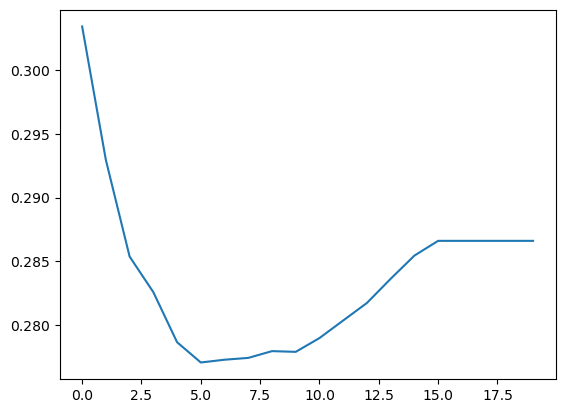

In [37]:
plt.plot(cost_history)
plt.show

TESTING

In [38]:
knn_kt = KNeighborsRegressor(n_neighbors = int(optimal_k)).fit(x_train, y_train) #knn k tuning aka knn_kt
knn_kt

KNeighborsRegressor(n_neighbors=9)

In [39]:
y_pred = knn_kt.predict(x_test)

In [40]:
trainscore = knn_kt.score(x_train, y_train)
testscore = knn_kt.score(x_test, y_test)
print("Train Score:", trainscore)
print("Test Score:", testscore)

Train Score: 0.7746535502538328
Test Score: 0.7307519646093426


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.27724712660649775
Mean Absolute Error: 0.3593040168607793
